First of all we will create virtual environment and install the kernel and the required packages. Here the name of environment is pytorch_venv

## TODO Recording

- In a terminal window under a projects/ folder
- Make sure the projects/ directory is empty

`python --version`

`python -m venv pytorch_venv`

`ls -l`

`source pytorch_venv/bin/activate`

`python --version`

`pip install ipykernel`

`jupyter kernelspec list`

`python -m ipykernel install --user --name=pytorch_venv`

`jupyter kernelspec list`

`jupyter notebook`

- Make sure you use the pytorch_venv and create a new notebook

https://github.com/mwaskom/seaborn/issues/3462

In [293]:
import warnings

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [294]:
!pip install scikit-learn

In [295]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [296]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [297]:
import torch

torch.__version__

'2.7.0'

Importing required packages

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler , OneHotEncoder

Loading the data
link-https://www.kaggle.com/datasets/simranjain17/insurance?select=insurance.csv

In [301]:
insurance_data = pd.read_csv("datasets/insurance.csv")

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [302]:
insurance_data.shape

(1338, 7)

In [303]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [304]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='charges', ylabel='Count'>

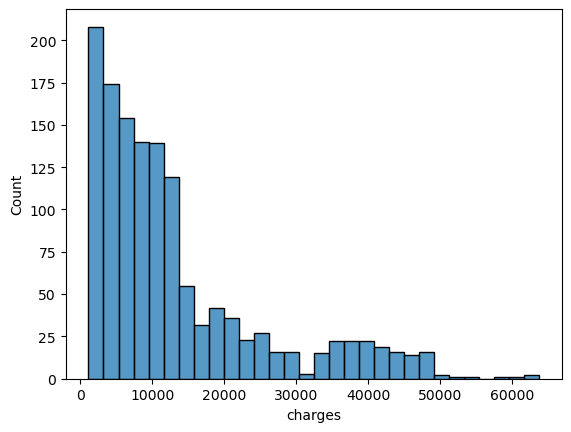

In [305]:
sns.histplot(insurance_data["charges"])

<Axes: xlabel='smoker', ylabel='charges'>

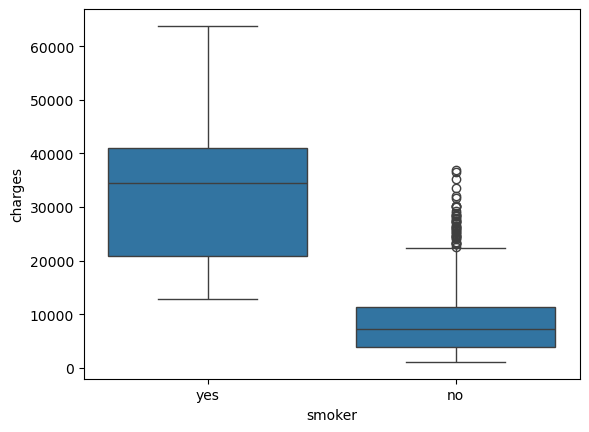

In [306]:
sns.boxplot(y = insurance_data["charges"], x = insurance_data["smoker"])

<Axes: xlabel='age', ylabel='charges'>

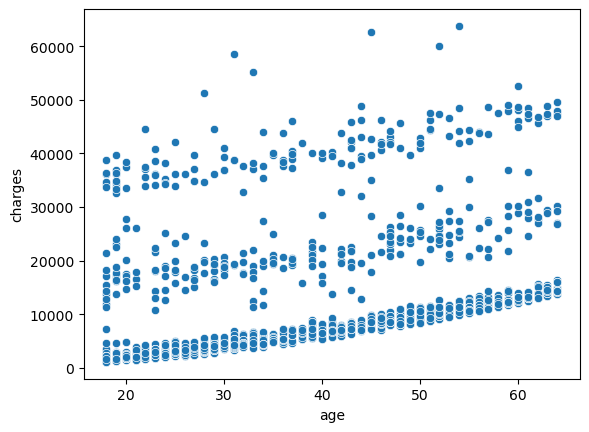

In [307]:
sns.scatterplot(y = insurance_data["charges"], x = insurance_data["age"])

Splitting the data into training and validation sets

In [309]:
X = insurance_data.drop(columns = ["charges"])
y = insurance_data["charges"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1070, 6), (268, 6), (1070,), (268,))

Preprocessor for Data is defined by creating an instance of One-hot-encoder and also defining a column transformer to apply the One hot encoding to catrgorical varaiables only

In [311]:
categorical_features = ["sex", "smoker", "region"]

categorical_transformer = OneHotEncoder(
    handle_unknown = "ignore", drop = "first", sparse_output = False
)

preprocessor = ColumnTransformer(
    transformers = [("cat_tr", categorical_transformer, categorical_features)],
    remainder = "passthrough"
)

Applying preprocessor to train and validation data and checking the no. of columns

In [313]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

X_train.shape, X_val.shape

((1070, 8), (268, 8))

Preprocessed training data is shown which is in Numpy array form and one hot encoded columns are seen but with no column names

In [315]:
print(X_train)

[[ 1.     0.     1.    ... 40.    26.315  1.   ]
 [ 0.     1.     0.    ... 37.    38.39   0.   ]
 [ 1.     0.     0.    ... 50.    26.6    0.   ]
 ...
 [ 0.     0.     0.    ... 19.    28.4    1.   ]
 [ 1.     0.     0.    ... 18.    23.085  0.   ]
 [ 0.     1.     1.    ... 53.    36.86   3.   ]]


The numpy array is made into dataframe with column names for full clarity of data preprocessing

In [317]:
pd.DataFrame(X_train, columns = preprocessor.get_feature_names_out()).T

,0,1,2,3,4,5,6,7,8,9,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069
cat_tr__sex_male,1.000,0.00,1.0,1.000,0.0,1.0,0.0,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.0,1.000,0.00,0.0,1.000,0.00
cat_tr__smoker_yes,0.000,1.00,0.0,0.000,0.0,0.0,0.0,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.0,0.000,0.00,0.0,0.000,1.00
cat_tr__region_northwest,1.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.0,0.000,1.00,0.0,0.000,1.00
cat_tr__region_southeast,0.000,1.00,0.0,0.000,0.0,1.0,0.0,1.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.000,0.00
cat_tr__region_southwest,0.000,0.00,1.0,0.000,1.0,0.0,1.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.000,0.00,1.0,0.000,0.00
remainder__age,40.000,37.00,50.0,46.000,21.0,59.0,48.0,32.00,26.00,33.00,...,58.00,28.00,39.00,21.00,54.0,37.000,20.00,19.0,18.000,53.00
remainder__bmi,26.315,38.39,26.6,24.795,17.4,26.4,28.9,37.18,27.06,42.94,...,32.01,34.77,26.41,35.72,30.8,22.705,31.92,28.4,23.085,36.86
remainder__children,1.000,0.00,0.0,3.000,1.0,0.0,0.0,2.00,0.00,3.00,...,1.00,0.00,0.00,0.00,3.0,3.000,0.00,1.0,0.000,3.00


The target values converted into numpy array and some are displayed which are  quite large, so our Mean squared error will be large

In [319]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

y_train[:10]

array([ 6389.37785, 40419.0191 ,  8444.474  ,  9500.57305,  2585.269  ,
       11743.299  ,  8277.523  ,  4673.3922 , 17043.3414 ,  6360.9936 ])

Scaling all columns before training otherwise Error will be NAs training wont happen

In [321]:
stdscaler = StandardScaler()

X_train = stdscaler.fit_transform(X_train)
X_val = stdscaler.transform(X_val)

print(X_train)

[[ 0.98884723 -0.5         1.72132593 ...  0.06207177 -0.71961
  -0.06736631]
 [-1.01127855  2.         -0.5809475  ... -0.15057538  1.28697921
  -0.8864794 ]
 [ 0.98884723 -0.5        -0.5809475  ...  0.77089561 -0.67224951
  -0.8864794 ]
 ...
 [-1.01127855 -0.5        -0.5809475  ... -1.42645829 -0.37313062
  -0.06736631]
 [ 0.98884723 -0.5        -0.5809475  ... -1.49734067 -1.25636223
  -0.8864794 ]
 [-1.01127855  2.          1.72132593 ...  0.98354276  1.03272816
   1.57085987]]


Scaling targets using MinMax scaler

In [323]:
y_train.reshape(-1, 1)

array([[ 6389.37785],
       [40419.0191 ],
       [ 8444.474  ],
       ...,
       [ 2331.519  ],
       [ 1704.70015],
       [46661.4424 ]])

In [324]:
min_max_scaler = MinMaxScaler()

y_train = min_max_scaler.fit_transform(y_train.reshape(-1, 1))

y_val = min_max_scaler.transform(y_val.reshape(-1, 1))

Converting inputs and targets to tensors

In [326]:
train_inputs = torch.from_numpy(X_train).float()
train_targets = torch.from_numpy(y_train.reshape(-1, 1)).float()

train_inputs.shape, train_targets.shape

(torch.Size([1070, 8]), torch.Size([1070, 1]))

Creating a Simple Neural network which is equivalent to Linear Regression model

In [328]:
#class SimpleNeuralNet(nn.Module):

    # Initialize the layers
   # def __init__(self, num_features):

    #    super().__init__()

   #     self.linear1 = nn.Linear(num_features, 1)

    # Perform the computation
 #   def forward(self, x):

  #      x = self.linear1(x)

   #     return x

In [329]:
class SimpleNeuralNet(nn.Module):
    # Initialize the layers
    def __init__(self, num_features):
        super().__init__()

        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

## Neural Network with more layers
class NeuralNetRegression(nn.Module):
    # Initialize the layers
    def __init__(self, num_features):
        super(NeuralNetRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)

        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return (x)

In [331]:
model = SimpleNeuralNet(num_features=8)

print(model)

SimpleNeuralNet(
  (layer_1): Linear(in_features=8, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


Model weights and biases can be obtained

In [333]:
for layer in model.children():

    if isinstance(layer, nn.Linear):
        print(layer.state_dict()["weight"])
        print(layer.state_dict()["bias"])

tensor([[-0.1803,  0.1298,  0.3156,  0.0250,  0.2799,  0.3438,  0.2279, -0.2417],
        [-0.0058,  0.2268,  0.0646, -0.0680,  0.3219,  0.0699,  0.2644,  0.1322],
        [-0.2860,  0.2253, -0.1914,  0.3364,  0.3308, -0.0888, -0.2853, -0.2614],
        [ 0.0603,  0.0042,  0.1910,  0.1391,  0.0518,  0.0928, -0.2598, -0.0069],
        [-0.1372,  0.0303,  0.1894, -0.1801, -0.3151, -0.2162,  0.1826, -0.0897],
        [ 0.0243, -0.2111,  0.2206, -0.1465, -0.1953, -0.0216,  0.3416,  0.2378],
        [ 0.1567,  0.1528, -0.0077,  0.1514,  0.1117, -0.3418, -0.2566, -0.2638],
        [-0.1863, -0.1250, -0.3030, -0.2798, -0.1363, -0.2004, -0.2304,  0.1054],
        [ 0.3087,  0.0736,  0.2171,  0.1632, -0.2199, -0.1518,  0.0163,  0.0468],
        [-0.1640, -0.2586,  0.1543, -0.2553, -0.1163,  0.3128,  0.1758,  0.2464],
        [ 0.1456, -0.3194,  0.0145, -0.2257, -0.2892, -0.2680,  0.1382, -0.0027],
        [ 0.2741,  0.3051, -0.2096,  0.0018, -0.1702, -0.3367,  0.0945, -0.0064],
        [-0.0182

In [334]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

1233

Defining loss function for model which is mse_loss

In [336]:
import torch.nn.functional as F

loss_fn = F.mse_loss

Obtaining Loss for untrained model

In [338]:
loss = loss_fn(model(train_inputs), train_targets)

print(loss)

tensor(0.0505, grad_fn=<MseLossBackward0>)


Generating  predictions with untrained model initialiased with random weights and biases

In [340]:
preds = model(train_inputs)

preds

tensor([[0.2973],
        [0.3440],
        [0.2929],
        ...,
        [0.3116],
        [0.3557],
        [0.3202]], grad_fn=<AddmmBackward0>)

Now we would be using Torchmetrics library for calculating the performance metrics of untrained model

In [342]:
from torchmetrics.regression import R2Score
from torchmetrics.regression import MeanSquaredError

MSE = MeanSquaredError()

r2score = R2Score()

print("Mean Squared Error :", MSE(preds, train_targets).item())
print("R^2 :", r2score(preds, train_targets).item())

Mean Squared Error : 0.05045256391167641
R^2 : -0.3155254125595093


Defining the Dataset and creating dataloader for training model in batches

In [344]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(train_inputs, train_targets)

train_ds[:5]

(tensor([[ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478,  0.0621, -0.7196, -0.0674],
         [-1.0113,  2.0000, -0.5809,  1.6095, -0.5478, -0.1506,  1.2870, -0.8865],
         [ 0.9888, -0.5000, -0.5809, -0.6213,  1.8254,  0.7709, -0.6722, -0.8865],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478,  0.4874, -0.9722,  1.5709],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254, -1.2847, -2.2011, -0.0674]]),
 tensor([[0.0857],
         [0.6393],
         [0.1191],
         [0.1363],
         [0.0238]]))

Defining  data loader from dataset and enabling shuffling for Training dataloader

In [346]:
batch_size = 8

train_dl = DataLoader(train_ds, batch_size, shuffle = True)

next(iter(train_dl))

[tensor([[ 0.9888, -0.5000, -0.5809, -0.6213,  1.8254, -1.4265, -0.5061, -0.8865],
         [-1.0113,  2.0000, -0.5809, -0.6213,  1.8254, -0.2215, -1.3370,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213,  1.8254, -1.1429,  0.3414,  1.5709],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254,  1.6924,  0.1919, -0.8865],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.7885, -0.6091,  0.7517],
         [-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.1330,  0.9031, -0.0674],
         [ 0.9888, -0.5000, -0.5809,  1.6095, -0.5478,  0.4874,  1.2504,  0.7517],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254, -0.5759, -0.2568, -0.8865]]),
 tensor([[0.0021],
         [0.2845],
         [0.0402],
         [0.2076],
         [0.0539],
         [0.0921],
         [0.1175],
         [0.0429]])]

Creating Dataset and Dataloader for Validation data

In [348]:
val_inputs = torch.from_numpy(X_val).float()
val_targets = torch.from_numpy(y_val.reshape(-1, 1)).float()

In [349]:
val_ds = TensorDataset(val_inputs, val_targets)

val_ds[:5]

(tensor([[-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7000,  1.9999,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.5050,  1.1117, -0.0674],
         [-1.0113,  2.0000, -0.5809, -0.6213,  1.8254, -0.8594,  0.1254, -0.8865],
         [ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478, -0.2923, -1.0827, -0.0674],
         [ 0.9888, -0.5000, -0.5809,  1.6095, -0.5478,  1.4797, -0.8152, -0.8865]]),
 tensor([[0.1412],
         [0.0577],
         [0.5485],
         [0.0651],
         [0.1793]]))

In [350]:
val_dl = DataLoader(val_ds, batch_size)

next(iter(val_dl))

[tensor([[-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7000,  1.9999,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.5050,  1.1117, -0.0674],
         [-1.0113,  2.0000, -0.5809, -0.6213,  1.8254, -0.8594,  0.1254, -0.8865],
         [ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478, -0.2923, -1.0827, -0.0674],
         [ 0.9888, -0.5000, -0.5809,  1.6095, -0.5478,  1.4797, -0.8152, -0.8865],
         [-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7709, -0.4130,  1.5709],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.8594, -1.9510,  1.5709],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254, -0.4341, -2.0183, -0.0674]]),
 tensor([[0.1412],
         [0.0577],
         [0.5485],
         [0.0651],
         [0.1793],
         [0.1559],
         [0.0603],
         [0.0593]])]

The Training Loop:

Gets a batch of training data from the DataLoader

Zeros the optimizer’s gradients

Performs an inference - that is, gets predictions from the model for an input batch

Calculates the loss for that set of predictions vs. the labels on the dataset

Calculates the backward gradients over the learning weights

Tells the optimizer to perform one learning step - that is, adjust the model’s learning weights based on the observed gradients for this batch, according to the optimization algorithm we chose

In [352]:
loss_stats = {
    "train": [],
    "val": []
}

num_epochs = 100

In [353]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using mps device


In [354]:
model = SimpleNeuralNet(num_features=8).to(device)

print(model)

SimpleNeuralNet(
  (layer_1): Linear(in_features=8, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [355]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [356]:
for epoch in range(num_epochs):
    # TRAINING
    train_epoch_loss = 0

    model.train()

    for X_train_batch, y_train_batch in train_dl:

        optimizer.zero_grad()

        # Move data to the same device as the model
        X_train_batch, y_train_batch = \
            X_train_batch.to(device), y_train_batch.to(device)

        # Generate predictions and compute loss
        preds = model(X_train_batch)

        train_loss = loss_fn(preds, y_train_batch)

        # Perform gradient descent
        train_loss.backward()

        optimizer.step()

        train_epoch_loss += train_loss.item()

    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0

        model.eval()

        for X_val_batch, y_val_batch in val_dl:

            X_val_batch, y_val_batch = \
                X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = loss_fn(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()

    train_loss = train_epoch_loss / len(train_dl)
    val_loss = val_epoch_loss / len(val_dl)

    loss_stats["train"].append(train_loss)
    loss_stats["val"].append(val_loss)

    print(f'Epoch {epoch+0:01}: | Train Loss: {train_loss:.3f} | Val Loss: {val_loss:.3f}')

Epoch 0: | Train Loss: 0.048 | Val Loss: 0.034
Epoch 1: | Train Loss: 0.030 | Val Loss: 0.031
Epoch 2: | Train Loss: 0.027 | Val Loss: 0.027
Epoch 3: | Train Loss: 0.024 | Val Loss: 0.023
Epoch 4: | Train Loss: 0.020 | Val Loss: 0.020
Epoch 5: | Train Loss: 0.018 | Val Loss: 0.017
Epoch 6: | Train Loss: 0.015 | Val Loss: 0.014
Epoch 7: | Train Loss: 0.014 | Val Loss: 0.012
Epoch 8: | Train Loss: 0.013 | Val Loss: 0.011
Epoch 9: | Train Loss: 0.012 | Val Loss: 0.010
Epoch 10: | Train Loss: 0.012 | Val Loss: 0.010
Epoch 11: | Train Loss: 0.011 | Val Loss: 0.009
Epoch 12: | Train Loss: 0.011 | Val Loss: 0.009
Epoch 13: | Train Loss: 0.011 | Val Loss: 0.008
Epoch 14: | Train Loss: 0.011 | Val Loss: 0.008
Epoch 15: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 16: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 17: | Train Loss: 0.010 | Val Loss: 0.007
Epoch 18: | Train Loss: 0.010 | Val Loss: 0.007
Epoch 19: | Train Loss: 0.010 | Val Loss: 0.007
Epoch 20: | Train Loss: 0.010 | Val Loss: 0.007
Ep

In [357]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats). \
    reset_index().melt(id_vars = ["index"]). \
    rename(columns = {"index": "epochs"})

train_val_loss_df.head()

,epochs,variable,value
0,0,train,0.048183
1,1,train,0.030454
2,2,train,0.027054
3,3,train,0.023669
4,4,train,0.020401


In [358]:
train_val_loss_df.tail()

,epochs,variable,value
195,95,val,0.004075
196,96,val,0.004077
197,97,val,0.004146
198,98,val,0.004044
199,99,val,0.004101


Text(0.5, 1.0, 'Train-Val Loss vs Epoch')

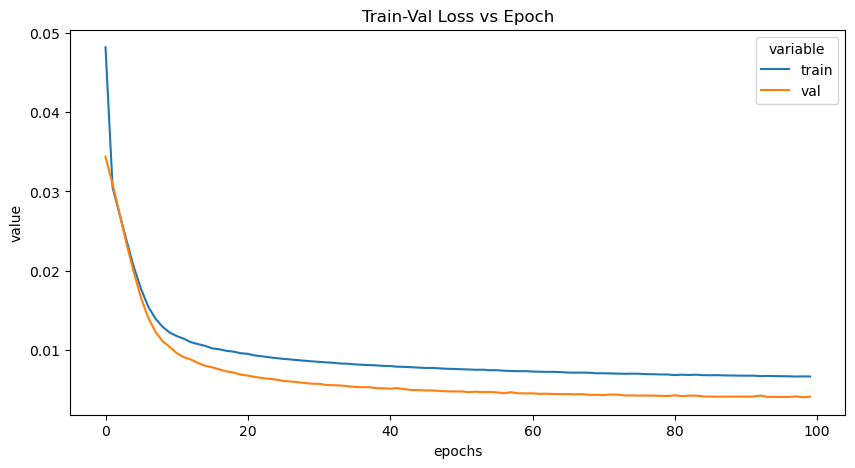

In [359]:
plt.figure(figsize = (10, 5))

sns.lineplot(data = train_val_loss_df,
             x = "epochs", y = "value",
             hue = "variable"
).set_title("Train-Val Loss vs Epoch")

Ideally, We should make predictions on a separate test data by creating a Test dataloader. Here we are getting predictions on our validation data and checking the performance

In [361]:
y_true = []
y_pred = []

with torch.no_grad():

    model.eval()

    for X_batch, y_batch in val_dl:
        X_batch = X_batch.to(device)

        y_test_pred = model(X_batch)

        y_true.extend(y_batch)
        y_pred.extend(y_test_pred)

All  labels from validation dataloader are collected in the list and top 10 labels are shown

In [363]:
y_true[:10]

[tensor([0.1412]),
 tensor([0.0577]),
 tensor([0.5485]),
 tensor([0.0651]),
 tensor([0.1793]),
 tensor([0.1559]),
 tensor([0.0603]),
 tensor([0.0593]),
 tensor([0.0090]),
 tensor([0.1340])]

Stacking all labels for calculating performance

In [365]:
y_true_stacked = torch.stack((y_true))

y_true_stacked[:10]

tensor([[0.1412],
        [0.0577],
        [0.5485],
        [0.0651],
        [0.1793],
        [0.1559],
        [0.0603],
        [0.0593],
        [0.0090],
        [0.1340]])

All predictions are stacked too

In [367]:
y_pred_stacked = torch.stack((y_pred))

y_pred_stacked[:10]

tensor([[0.2008],
        [0.0959],
        [0.4314],
        [0.1227],
        [0.1516],
        [0.2144],
        [0.1002],
        [0.0988],
        [0.0382],
        [0.1155]], device='mps:0')

So the performance of simplest neural network is obtained which is around 80% R square.

In [369]:
MSE = MeanSquaredError().to(device)
r2score = R2Score().to(device)

print("Mean Squared Error :", round(MSE(y_pred_stacked.to(device), y_true_stacked.to(device)).item(), 3))

print("R^2 :", round(r2score(y_pred_stacked.to(device), y_true_stacked.to(device)).item(), 3))

Mean Squared Error : 0.004
R^2 : 0.899


## TODO Recording:

After that we train the model with the second neural network which has 1233 no. of parameters and performance seems to have increased by around 9 percent.